## Advanced Box Score Calculations
Author: Akshay Easwaran <akeaswaran@me.com>

---
Based on work by ESPN's Bill Connelly, Football Outsiders, and Football Study Hall

Data from CollegeFootballData.com

Useful Resources for Stat Definitions:
- Football Study Hall website: https://www.footballstudyhall.com/
- Football Study Hall book: https://www.amazon.com/Study-Hall-College-Football-Stories/dp/1484989961
- Football Outsiders: https://www.footballoutsiders.com/info/glossary
- Example Advanced Box Score: https://twitter.com/ESPN_BillC/status/1176572006969597954/photo/1

**How to use this Notebook**

1. Dump game, play by play, and drive data for an entire season from CollegeFootballData.com.
2. Change the file names in the next cell to match where your data files are located.
3. Change the away and home team names appropriately.
4. Hit Cell > Run All Cells.

In [2]:
# import pandas as pd

# base_drives = pd.read_json('data/drives/drive-data-national.json')
# base_drives.drop(['offense_conference','start_time','end_time','defense_conference','elapsed','start_period','end_period'], axis = 1, inplace=True) 
# base_drives = base_drives[
#     ~base_drives.drive_result.isin(['Uncategorized'])
# ]

# games = pd.read_json('data/games/game-data-national.json')

# selected_team = 'National'

In [3]:
# # Data Cleaning
# # Fix the bad yard line markers for away teams
# drives = pd.merge(base_drives, games[['id','away_team','home_team']], left_on='game_id', right_on='id', how='right')
# drives.rename(columns={'id_x':'drive_id'}, inplace=True)
# drives.drop(['id_y'], axis = 1, inplace=True)
# drives.dropna(inplace=True)
# drives.loc[
#     drives.offense == drives.away_team, ['start_yardline']
# ] = 100 - drives.start_yardline
# drives.loc[
#     drives.offense == drives.away_team, ['end_yardline']
# ] = 100 - drives.end_yardline

# print("Total Drives:", len(drives))
# # drives

In [4]:
# print(selected_team, "Drives:", len(drives))

# print(selected_team, "Avg Starting Field Position:", sum(drives.start_yardline) / len(drives))
# print(selected_team, "Mdn Starting Field Position:", drives.start_yardline.median())
# print("")

# drives['yards_per_play'] = drives.apply(lambda x: (x.yards / x.plays) if (x.plays > 0) else 0, axis=1)
# print(selected_team, "Avg Yards per Play:", drives.yards_per_play.mean())
# print(selected_team, "Mdn Yards per Play:", drives.yards_per_play.median())

# print("")
# print(selected_team, "Avg Plays per Drive:", drives.plays.mean())
# print(selected_team, "Mdn Plays per Drive:", drives.plays.median())

# print("")
# print(selected_team, "Avg Yards per Drive:", drives.yards.mean())
# print(selected_team, "Mdn Yards per Drive:", drives.yards.median())

In [5]:
# %matplotlib inline

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 1,figsize=(12,8))
# ax.hist(drives.yards, bins=[-20,-10,0,10,20,30,40,50,60,70,80,90,100]);
# ax.set_ylabel("Frequency");
# ax.set_xlabel("Drive Yardage");

In [6]:
# fig, ax = plt.subplots(1, 1,figsize=(12,8))
# ax.scatter(drives.start_yardline, drives.yards_per_play);
# ax.set_ylabel("yards per play");
# ax.set_xlabel("Start Position");

In [7]:
# pbp_data = pd.read_json('data/pbp/pbp-data-national.json')
# # Eliminate garbage time plays
# # garbage_time_data = pbp_data[
# #     (pbp_data.down == 0)
# #     | ((abs(pbp_data.offense_score - pbp_data.defense_score) >= 38) & (pbp_data.period == 2))
# #     | ((abs(pbp_data.offense_score - pbp_data.defense_score) >= 28) & (pbp_data.period == 3))
# #     | ((abs(pbp_data.offense_score - pbp_data.defense_score) >= 22) & (pbp_data.period == 4))
# # ]

# print("Total Plays:", len(pbp_data))
# # print("Garbage Time Plays:", len(garbage_time_data))
# # pbp_data.drop(garbage_time_data.index, inplace=True)
# print("Non-Garbage Time Plays:", len(pbp_data))

# # Drop some unnecessary columns
# pbp_data.drop(['offense_conference','defense_conference','clock'], axis = 1, inplace=True) 
# # Ignore some types of plays cause they're special teams and weird
# ignore_types = ["Defensive 2pt Conversion","Blocked Field Goal","Blocked Punt","Missed Field Goal Return","Blocked Punt Touchdown","Missed Field Goal Return Touchdown","Extra Point Missed","Extra Point Good","Timeout","End of Half","End of Game","Uncategorized","Penalty","Kickoff","Kickoff Return (Offense)","Kickoff Return Touchdown","Punt", "Field Goal Good","Field Goal Missed","Safety"]
# pbp_data = pbp_data[~(pbp_data.play_type.isin(ignore_types))]
# print("Total clean plays:", len(pbp_data))

In [8]:
# import numpy as np

# pbp_data.distance = pbp_data.distance.astype(float)

# bad_types = ["Interception","Pass Interception Return","Interception Return Touchdown",'Fumble Recovery (Opponent)','Sack','Fumble Return Touchdown']

# def is_successful(down, distance, yards_gained, play_type):
#     if (play_type in bad_types):
#         return False 
#     if ((down == 1) & (yards_gained >= (0.5 * distance))):
#         return True
#     elif ((down == 2)) & (yards_gained >= (0.7 * distance)):
#         return True
#     elif (((down == 3) | (down == 4)) & (yards_gained >= distance)):
#         return True
#     else:
#         return False
    
# pbp_data['play_successful'] = np.vectorize(is_successful)(pbp_data.down, pbp_data.distance, pbp_data.yards_gained, pbp_data.play_type)
# pbp_data.play_successful.value_counts()

# def is_explosive(yards_gained):
#     if (yards_gained >= 15):
#         return True
#     else:
#         return False
    
# pbp_data['play_explosive'] = np.vectorize(is_explosive)(pbp_data.yards_gained)

In [9]:
# pass_types = ["Pass Reception","Pass Incompletion","Passing Touchdown","Interception","Pass Interception Return","Interception Return Touchdown"]
# rush_types = ["Rush","Rushing Touchdown",'Fumble Recovery (Opponent)','Sack','Fumble Return Touchdown']

# print("Offensive Success Rates")
# base_overall = len(pbp_data[(pbp_data.play_successful == True)]) / len(pbp_data)
# print("Overall:",base_overall)
# base_passing = len(pbp_data[(pbp_data.play_successful == True) & (pbp_data.play_type.isin(pass_types))]) / len(pbp_data[(pbp_data.play_type.isin(pass_types))])
# print("Passing:",base_passing)
# base_rushing = len(pbp_data[(pbp_data.play_successful == True) & (pbp_data.play_type.isin(rush_types))]) / len(pbp_data[(pbp_data.play_type.isin(rush_types))])
# print("Rushing:",base_rushing)
# print("")


# print("Offensive Explosiveness Rates")
# base_exp_overall = len(pbp_data[(pbp_data.play_explosive == True)]) / len(pbp_data)
# print("Overall:",base_exp_overall)
# base_exp_passing = len(pbp_data[(pbp_data.play_explosive == True) & (pbp_data.play_type.isin(pass_types))]) / len(pbp_data[(pbp_data.play_type.isin(pass_types))])
# print("Passing:",base_exp_passing)
# base_exp_rushing = len(pbp_data[(pbp_data.play_explosive == True) & (pbp_data.play_type.isin(rush_types))]) / len(pbp_data[(pbp_data.play_type.isin(rush_types))])
# print("Rushing:",base_exp_rushing)
# print("")

In [10]:
# # SR+
# selected_team = 'Georgia Tech'
# selected_team_data = pbp_data[
#     (pbp_data.offense == selected_team)
#     | (pbp_data.defense == selected_team)
# ]

# overall = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.offense == selected_team)]) / len(selected_team_data[(selected_team_data.offense == selected_team)])
# passing = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.offense == selected_team) & (selected_team_data.play_type.isin(pass_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(pass_types)) & (selected_team_data.offense == selected_team)])
# rushing = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.offense == selected_team) & (selected_team_data.play_type.isin(rush_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(rush_types)) & (selected_team_data.offense == selected_team)])

# exp_overall = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.offense == selected_team)]) / len(selected_team_data[(selected_team_data.offense == selected_team)])
# exp_passing = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.offense == selected_team) & (selected_team_data.play_type.isin(pass_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(pass_types)) & (selected_team_data.offense == selected_team)])
# exp_rushing = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.offense == selected_team) & (selected_team_data.play_type.isin(rush_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(rush_types)) & (selected_team_data.offense == selected_team)])

# def_overall = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.defense == selected_team)]) / len(selected_team_data[(selected_team_data.defense == selected_team)])
# def_passing = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.defense == selected_team) & (selected_team_data.play_type.isin(pass_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(pass_types)) & (selected_team_data.defense == selected_team)])
# def_rushing = len(selected_team_data[(selected_team_data.play_successful == True) & (selected_team_data.defense == selected_team) & (selected_team_data.play_type.isin(rush_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(rush_types)) & (selected_team_data.defense == selected_team)])

# exp_def_overall = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.defense == selected_team)]) / len(selected_team_data[(selected_team_data.defense == selected_team)])
# exp_def_passing = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.defense == selected_team) & (selected_team_data.play_type.isin(pass_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(pass_types)) & (selected_team_data.defense == selected_team)])
# exp_def_rushing = len(selected_team_data[(selected_team_data.play_explosive == True) & (selected_team_data.defense == selected_team) & (selected_team_data.play_type.isin(rush_types))]) / len(selected_team_data[(selected_team_data.play_type.isin(rush_types)) & (selected_team_data.defense == selected_team)])


# def plus_adj(base, comp):
#     diff = comp - base
#     pct = (diff / base) * 100
#     return 100 + pct

# print(selected_team,"SR+ Stats")
# print("")

# print("Offensive (higher + is better)")
# print("Overall Off SR:",overall)
# print("Overall Off SR+:",plus_adj(base_overall, overall))
# print("")
# print("Passing Off SR:",passing)
# print("Passing Off SR+:",plus_adj(base_passing, passing))
# print("")
# print("Rushing Off SR:",rushing)
# print("Rushing Off SR+:",plus_adj(base_rushing, rushing))

# print("")

# print("Overall Off ER:",exp_overall)
# print("Overall Off ER+:",plus_adj(base_exp_overall, exp_overall))
# print("")
# print("Passing Off ER:",exp_passing)
# print("Passing Off ER+:",plus_adj(base_exp_passing, exp_passing))
# print("")
# print("Rushing Off ER:",exp_rushing)
# print("Rushing Off ER+:",plus_adj(base_exp_rushing, exp_rushing))

# print("")

# print("Defensive (lower + is better)")
# print("Overall Def SR:",def_overall)
# print("Overall Def SR+:",plus_adj(base_overall, def_overall))
# print("")
# print("Passing Def SR:",def_passing)
# print("Passing Def SR+:",plus_adj(base_passing, def_passing))
# print("")
# print("Rushing Def SR:",def_rushing)
# print("Rushing Def SR+:",plus_adj(base_rushing, def_rushing))

# print("")

# print("Overall Def ER:",exp_def_overall)
# print("Overall Def ER+:",plus_adj(base_exp_overall, exp_def_overall))
# print("")
# print("Passing Def ER:",exp_def_passing)
# print("Passing Def ER+:",plus_adj(base_exp_passing, exp_def_passing))
# print("")
# print("Rushing Def ER:",exp_def_rushing)
# print("Rushing Def ER+:",plus_adj(base_exp_rushing, exp_def_rushing))

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def retrieveCfbDataFile(endpoint, year):
    return pd.read_csv(f"data/{endpoint}/{year}.csv", encoding='latin-1')


pbp_data = pd.DataFrame()
for i in range(2012, 2020):    
    plys = retrieveCfbDataFile('pbp',i)
    plys['year'] = i
    pbp_data = pbp_data.append(plys, sort=False)
pbp_data.reset_index(inplace=True, drop=True)
# pbp_data.loc[
#     pbp_data.offense == pbp_data.away, ['yard_line']
# ] = 100 - pbp_data.yard_line

pbp_data.yard_line = pbp_data.apply(lambda y: 100 - y.yard_line if (y.offense == y.away) else y.yard_line, axis=1)

punt_plays = pbp_data[pbp_data.play_type.str.contains("Punt")]
pt_tmp = pd.DataFrame(data=punt_plays.play_text.str.extract('punt for (\d+) ya*r*ds', expand=True).astype(float))
pt_tmp.fillna(0, inplace=True)
punt_distance = pd.DataFrame(columns=["Index","Distance","Return","Net"])
if (len(pt_tmp) > 0):
    punt_distance["Index"] = pt_tmp.index
    punt_distance["Season"] = punt_distance.apply(lambda x: punt_plays.year[x.Index],axis=1)
    punt_distance["Offense"] = punt_distance.apply(lambda x: punt_plays.offense[x.Index],axis=1)
    punt_distance["PlayText"] = punt_distance.apply(lambda x: punt_plays.play_text[x.Index],axis=1)
    punt_distance["Yardline"] = punt_distance.apply(lambda x: 0 if (x.Index == None) else punt_plays.yard_line[x.Index],axis=1)
    punt_distance["Distance"] = pt_tmp.values
    punt_distance["Return"] = punt_distance.apply(lambda x: punt_plays.yards_gained[x.Index],axis=1)
    punt_distance["Net"] = punt_distance.Distance - punt_distance.Return
punt_distance

,Index,Distance,Return,Net,Season,Offense,PlayText,Yardline
0,17,61.0,0,61.0,2012,Northern Arizona,"Andy Wilder punt for 61 yards, downed at the A...",20
1,30,41.0,0,41.0,2012,Northern Arizona,"Andy Wilder punt for 41 yards, punt out-of-bou...",44
2,41,46.0,5,41.0,2012,Northern Arizona,"Andy Wilder punt for 46 yards, returned by A.J...",23
3,61,36.0,0,36.0,2012,Northern Arizona,"Andy Wilder punt for 36 yards, fair catch by R...",21
4,91,32.0,0,32.0,2012,Arizona State,"Taylor Kelly punt for 32 yards, downed at the ...",61
5,101,33.0,0,33.0,2012,Northern Arizona,"Andy Wilder punt for 33 yards, punt out-of-bou...",31
6,105,47.0,18,29.0,2012,Arizona State,"Josh Hubner punt for 47 yards, returned by Aus...",25
7,116,40.0,0,40.0,2012,Arizona State,"Josh Hubner punt for 40 yards, downed at the N...",45
8,138,38.0,0,38.0,2012,Northern Arizona,"Andy Wilder punt for 38 yards, downed at the A...",18
9,152,39.0,8,31.0,2012,Northern Arizona,"Andy Wilder punt for 39 yards, returned by Rob...",26


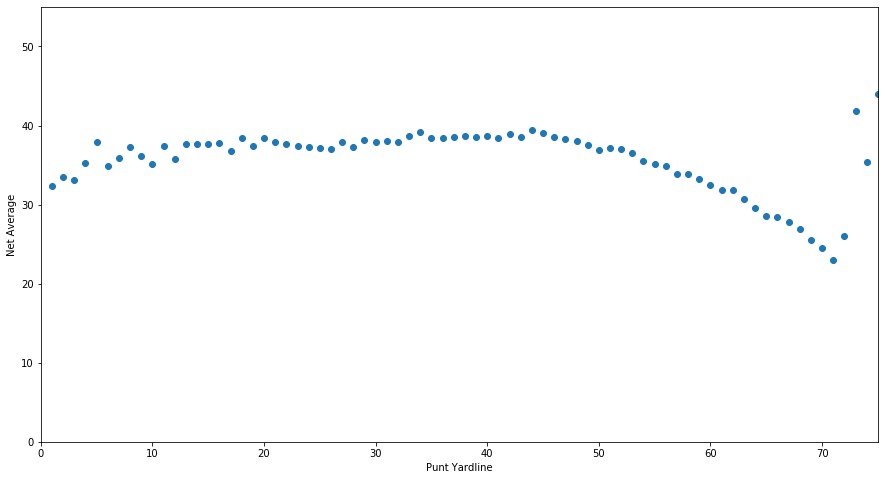

In [12]:
X_punt = punt_distance.groupby('Yardline').apply(lambda y: y.Yardline).drop_duplicates().to_numpy()[:, np.newaxis]
y_punt = punt_distance.groupby('Yardline').apply(lambda y: y['Net'].mean()).to_numpy()
fig, ax = plt.subplots(1, 1,figsize=(15,8))
ax.scatter(X_punt, y_punt);
ax.set_ylim((0, 55))
ax.set_xlim((0, 75))
ax.set_ylabel("Net Average");
ax.set_xlabel("Punt Yardline");

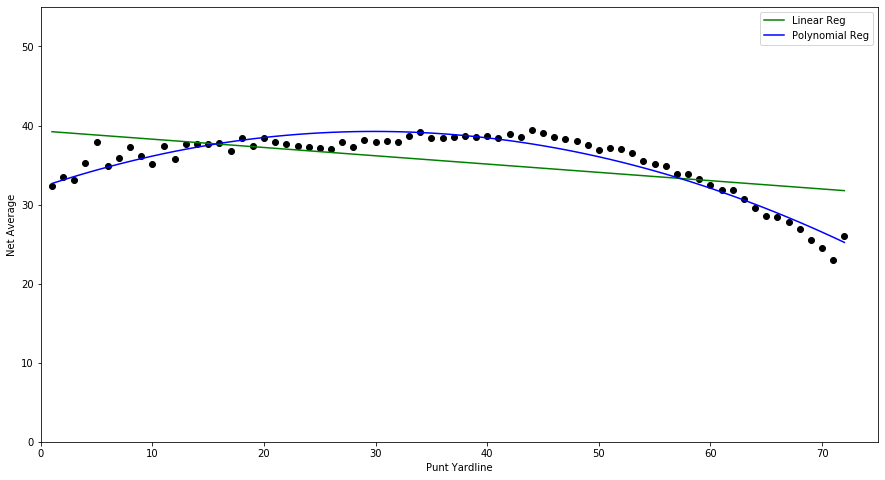

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline


base_set = punt_distance[punt_distance.Yardline <= 72.5]
X = base_set.groupby('Yardline').apply(lambda y: y.Yardline).drop_duplicates().to_numpy()[:, np.newaxis]
y = base_set.groupby('Yardline').apply(lambda y: y['Net'].mean()).to_numpy()

# print(X)

lin = LinearRegression()  
lin.fit(X, y) 

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# lin2 = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
# lin2.fit(X_poly, y)

fig, ax = plt.subplots(1, 1,figsize=(15,8))
# Visualising the Linear Regression results 
ax.scatter(X, y, color = 'black') 
ax.set_ylim((0, 55))
ax.set_xlim((0, 75))
ax.set_ylabel("Net Average");
ax.set_xlabel("Punt Yardline");
ax.plot(X, lin.predict(X), color = 'g', label="Linear Reg") 
ax.plot(X, lin2.predict(poly.fit_transform(X)), color = 'b', label="Polynomial Reg") 
ax.legend();

In [14]:
lin2.coef_

array([ 0.        ,  0.47192702, -0.00790244])

In [15]:
exp_punt_net = pd.DataFrame(data={"Yardline":range(1, 101)})
exp_punt_net['ExpPuntNet'] = lin2.predict(poly.fit_transform(exp_punt_net.Yardline.to_numpy()[:, np.newaxis]))
exp_punt_net.to_csv('results/punt_sr.csv', index=False, sep=",") # only uncomment to save the file
exp_punt_net

,Yardline,ExpPuntNet
0,1,32.670734
1,2,33.118954
2,3,33.551369
3,4,33.967979
4,5,34.368784
5,6,34.753784
6,7,35.122979
7,8,35.476370
8,9,35.813955
9,10,36.135736


In [16]:
# lin2.coef_[2] + (lin2.coef_[1] * (25 ** 1)) + (lin2.coef_[0] * (25 ** 2))
# 3 - 2 * x + x ** 2 - x ** 3
# [ 3., -2.,  1., -1.]

In [73]:
punts = punt_distance.copy()
succ_punt_curve = pd.read_csv("results/punt_sr.csv", encoding="latin-1")
def is_punt_successful(ydline, net):
    return net >= succ_punt_curve[succ_punt_curve.Yardline == ydline].ExpPuntNet.to_list()[0]
punts['Successful'] = punts.apply(lambda x: is_punt_successful(x.Yardline, x.Net), axis=1)
punts.Successful.value_counts(normalize=True)

True     0.57179
False    0.42821
Name: Successful, dtype: float64

In [75]:
# Punt SR by team, YoY
team_punts = punts.copy().groupby(['Season', 'Offense'])
# print(team_punts.groups)
ratings = team_punts.apply(lambda x: 0 if (len(x) == 0) else (len(x[x.Successful == True]) / len(x)))
team_fr_szn = ratings.reset_index()
team_fr_szn.columns = ["Season",'Offense','PuntSR']
team_fr_szn

pivot = team_fr_szn.pivot_table(values='PuntSR', index='Offense', columns='Season').reset_index()
# pivot.reset_index(inplace=True)
pivot
# pivot.corr()

Season,Offense,2012,2013,2014,2015,2016,2017,2018,2019
0,Abilene Christian,NaN,0.800000,0.142857,0.428571,0.666667,0.500000,0.571429,0.384615
1,Air Force,0.606061,0.540000,0.625000,0.454545,0.568182,0.609756,0.500000,0.517241
2,Akron,0.517241,0.611940,0.641791,0.585714,0.383333,0.555556,0.466667,0.375000
3,Alabama,0.695652,0.833333,0.729167,0.661017,0.800000,0.744186,0.457143,0.370370
4,Alabama A&M,0.500000,0.250000,0.222222,0.625000,0.240000,0.566667,0.300000,NaN
5,Alabama State,NaN,0.666667,NaN,NaN,0.222222,0.555556,0.454545,0.714286
6,Albany,NaN,0.333333,NaN,0.666667,0.714286,0.500000,0.200000,0.400000
7,Alcorn State,0.500000,0.875000,0.500000,0.750000,0.400000,0.800000,0.571429,0.571429
8,Appalachian State,0.833333,0.600000,0.533333,0.625000,0.645833,0.481481,0.596154,0.640625
9,Arizona,0.647059,0.535714,0.630137,0.686275,0.568627,0.317073,0.586957,0.389831


In [76]:
pivot[pivot.Offense == 'Georgia Tech']

Season,Offense,2012,2013,2014,2015,2016,2017,2018,2019
66,Georgia Tech,0.658537,0.666667,0.62069,0.466667,0.577778,0.72,0.806452,0.64557


In [31]:
## FG Exp Value

fg_plays = pbp_data[pbp_data.play_type.str.contains("Field Goal")]
fg_set = pd.DataFrame(columns=["Index","Offense","Season","PlayText","Yardline","Distance","Status"])
fg_set["Index"] = fg_plays.index
fg_set["Season"] = fg_set.apply(lambda x: fg_plays.year[x.Index],axis=1)
fg_set["Offense"] = fg_set.apply(lambda x: fg_plays.offense[x.Index],axis=1)
fg_set["PlayText"] = fg_set.apply(lambda x: fg_plays.play_text[x.Index],axis=1)
fg_set["Yardline"] = fg_set.apply(lambda x: 0 if (x.Index == None) else fg_plays.yard_line[x.Index],axis=1)
fg_set["Distance"] = (50 - (fg_set.Yardline % 50)) + 17

def verify_fg_status(play_type):
    if ("Good" in play_type):
        return "Good"
    elif ("Blocked" in play_type):
        return "Blocked"
    elif ("Missed" in play_type):
        return "Missed"
    else:
        return "Unknown"

fg_set["Status"] = fg_set.apply(lambda x: verify_fg_status(fg_plays.play_type[x.Index].replace("Field Goal ","")),axis=1)
fg_set.head(15)

,Index,Offense,Season,PlayText,Yardline,Distance,Status
0,218,Connecticut,2012,Chad Christen 36 yard field goal GOOD.,81,36,Good
1,247,Connecticut,2012,Chad Christen 47 yard field goal GOOD.,70,47,Good
2,316,Connecticut,2012,Chad Christen 19 yard field goal GOOD.,98,19,Good
3,362,Idaho,2012,Trey Farquhar 27 yard field goal GOOD.,90,27,Good
4,373,Eastern Washington,2012,Jimmy Pavel 34 yard field goal GOOD.,83,34,Good
5,446,Eastern Washington,2012,Jimmy Pavel 23 yard field goal GOOD.,95,22,Good
6,525,Sacramento State,2012,Edward Ruhnke 37 yard field goal MISSED.,79,38,Missed
7,588,Sacramento State,2012,Edgar Castaneda 32 yard field goal GOOD.,85,32,Good
8,624,Sacramento State,2012,Edgar Castaneda 25 yard field goal GOOD.,91,26,Good
9,734,South Carolina,2012,Adam Yates 20 yard field goal GOOD.,97,20,Good


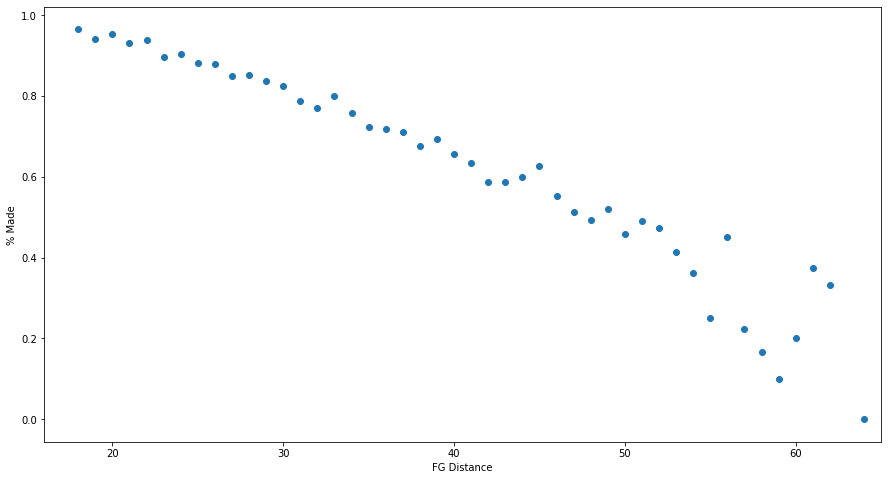

In [53]:
X_fg = fg_set.groupby('Distance').apply(lambda y: y.Distance).drop_duplicates()[:,np.newaxis]
y_fg = fg_set.groupby('Distance').apply(lambda x: 0 if (len(x) == 0) else (len(x[x.Status == 'Good']) / len(x)))[:,np.newaxis]
fig, ax = plt.subplots(1, 1,figsize=(15,8))
ax.scatter(X_fg, y_fg);
# ax.set_ylim((0, 55))
ax.set_xlim((min(X_fg)-2, 65)) # modern record is 65 yards from KState in 98
ax.set_ylabel("% Made");
ax.set_xlabel("FG Distance");

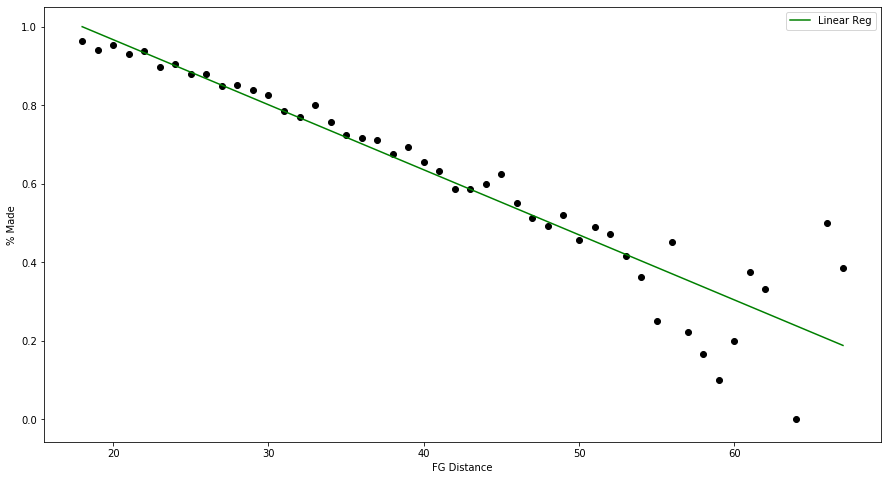

In [56]:
lin_fg = LinearRegression()  
lin_fg.fit(X_fg, y_fg) 

poly_fg = PolynomialFeatures(degree = 2) 
X_poly_fg = poly.fit_transform(X_fg)
poly_fg.fit(X_poly_fg, y_fg) 
lin2_fg = LinearRegression() 
lin2_fg.fit(X_poly_fg, y_fg) 

fig, ax = plt.subplots(1, 1,figsize=(15,8))
# Visualising the Linear Regression results 
ax.scatter(X_fg, y_fg, color = 'black') 
# ax.set_ylim((0, 55))
# ax.set_xlim((0, 75))
ax.set_ylabel("% Made");
ax.set_xlabel("FG Distance");
ax.plot(X_fg, lin_fg.predict(X_fg), color = 'g', label="Linear Reg") 
# ax.plot(X_fg, lin2_fg.predict(poly_fg.fit_transform(X_fg)), color = 'b', label="Polynomial Reg") 
ax.legend();

In [64]:
exp_fg_value = pd.DataFrame(columns=["Distance","Accuracy"])
exp_fg_value.Distance = fg_set.groupby('Distance').apply(lambda y: y.Distance).drop_duplicates()
exp_fg_value.Accuracy = lin_fg.predict(exp_fg_value.Distance[:,np.newaxis])#fg_set.groupby('Distance').apply(lambda x: 0 if (len(x) == 0) else (len(x[x.Status == 'Good']) / len(x))).to_numpy()
exp_fg_value['ExpFGValue'] = exp_fg_value.apply(lambda x: x.Accuracy * 3.0, axis=1)
exp_fg_value.reset_index(drop=True, inplace=True)
exp_fg_value.set_index(keys=['Distance'])
exp_fg_value.to_csv('results/fg_sr.csv', index=False, sep=",") # only uncomment to save the file
exp_fg_value

,Distance,Accuracy,ExpFGValue
0,18,1.000757,3.002271
1,19,0.984177,2.952532
2,20,0.967598,2.902794
3,21,0.951019,2.853056
4,22,0.934439,2.803317
5,23,0.917860,2.753579
6,24,0.901280,2.703840
7,25,0.884701,2.654102
8,26,0.868121,2.604364
9,27,0.851542,2.554625


In [72]:
# FG SR by team, YoY
fgs = fg_set.copy()
exp_fg = pd.read_csv("results/fg_sr.csv", encoding="latin-1")
def assign_fg_exp_val(distance):
    return exp_fg[exp_fg.Distance == distance].ExpFGValue.to_list()[0]
def generate_actual_val(x):
    if (x.Status == 'Good'):
        return 3
    else:
        return 0

fgs['ExpFGValue'] = fgs.apply(lambda x: assign_fg_exp_val(x.Distance), axis=1)
fgs['NetFGValue'] = fgs.apply(lambda x: generate_actual_val(x) - x.ExpFGValue, axis=1)

team_fg = fgs.copy().groupby(['Season', 'Offense'])
# print(team_punts.groups)
ratings_fg = team_fg.apply(lambda x: x.NetFGValue.mean())
team_fr_szn_fg = ratings_fg.reset_index()
team_fr_szn_fg.columns = ["Season",'Offense','FGSR']
team_fr_szn_fg

pivot_fg = team_fr_szn_fg.pivot_table(values='FGSR', index='Offense', columns='Season').reset_index()
# pivot.reset_index(inplace=True)
pivot_fg
# pivot.corr()

Season,Offense,2012,2013,2014,2015,2016,2017,2018,2019
0,Abilene Christian,NaN,0.097206,0.681632,-2.256195,-2.156718,-0.408026,1.091974,1.241189
1,Air Force,-1.031326,0.722260,0.343655,0.436214,0.307584,0.304015,0.117590,0.847426
2,Akron,0.155455,-0.416371,-0.072949,-0.259364,0.489164,-0.702649,0.212749,-0.361125
3,Alabama,0.244984,-0.060005,-0.261192,-0.085496,-0.037657,0.049969,-0.147557,-0.220273
4,Alabama A&M,NaN,-2.156718,NaN,0.495113,-2.057242,-2.803317,NaN,NaN
5,Alabama State,NaN,NaN,NaN,NaN,NaN,NaN,-1.758811,-0.956718
6,Albany,NaN,-0.482634,NaN,NaN,-2.156718,0.942758,NaN,-1.957765
7,Alcorn State,-2.256195,NaN,NaN,-2.156718,-0.333419,1.539619,NaN,-0.308550
8,Appalachian State,-0.073821,-0.209073,-0.523559,0.810186,-0.180003,0.092721,0.036650,-0.160034
9,Arizona,-0.300436,-0.259364,-0.156920,0.485298,0.238242,0.069515,0.063080,-0.245723


In [101]:
pivot_fg[pivot_fg.Offense == 'Georgia Tech']

Season,Offense,2012,2013,2014,2015,2016,2017,2018,2019
66,Georgia Tech,-0.397993,0.12681,-0.295753,0.186453,0.412351,-0.205933,0.188614,-0.957111


In [100]:
# 2019 Net FG Value per Kick rankings 
pivot_fg.dropna()[['Offense',2019]].sort_values(by=2019,ascending=False)

Season,Offense,2019
125,Nicholls,1.042235
133,Northern Arizona,1.017366
224,Western Carolina,0.992497
202,UC Davis,0.893020
1,Air Force,0.847426
221,Washington State,0.641212
102,Memphis,0.629587
184,TCU,0.570376
214,Vanderbilt,0.529801
212,Utah State,0.513320
